In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [38]:
# Hyper-parameters 
num_epochs = 2
batch_size = 1
learning_rate = 0.001


In [39]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [40]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [41]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [42]:
def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [43]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [44]:
print(len(train_loader))

50000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


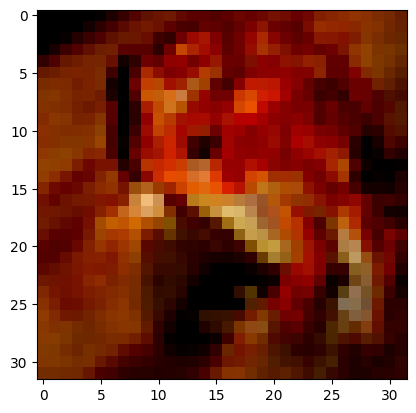

In [45]:
# show images
imshow(torchvision.utils.make_grid(images))

In [46]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


In [47]:
model = ConvNet().to(device)

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
from tqdm import tqdm

In [49]:

n_total_steps = len(train_loader)
n_correct = 0
n_samples = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy of the network: {100.0 * n_correct / n_samples} %')


Epoch [1/2], Step [2000/50000], Loss: 2.2422, Accuracy of the network: 11.15 %
Epoch [1/2], Step [4000/50000], Loss: 2.3245, Accuracy of the network: 12.175 %
Epoch [1/2], Step [6000/50000], Loss: 2.2868, Accuracy of the network: 12.3 %
Epoch [1/2], Step [8000/50000], Loss: 2.2773, Accuracy of the network: 12.525 %
Epoch [1/2], Step [10000/50000], Loss: 2.3872, Accuracy of the network: 13.23 %
Epoch [1/2], Step [12000/50000], Loss: 2.1998, Accuracy of the network: 14.408333333333333 %
Epoch [1/2], Step [14000/50000], Loss: 2.5871, Accuracy of the network: 15.592857142857143 %
Epoch [1/2], Step [16000/50000], Loss: 1.7910, Accuracy of the network: 16.76875 %
Epoch [1/2], Step [18000/50000], Loss: 2.3405, Accuracy of the network: 17.83888888888889 %
Epoch [1/2], Step [20000/50000], Loss: 1.2799, Accuracy of the network: 18.87 %
Epoch [1/2], Step [22000/50000], Loss: 1.2687, Accuracy of the network: 19.85 %
Epoch [1/2], Step [24000/50000], Loss: 0.8781, Accuracy of the network: 20.6666666

In [50]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


Finished Training


In [58]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # torch.max returns (value ,index) while torch.argmax returns only index
        predicted = torch.argmax(outputs,1)# if "1" is mentioned it will return tensor if not it will return index as an integer
        n_samples += labels.size(0)
        # print(f"sampels:{n_samples},Labels:{labels}")
        n_correct += (predicted == labels).sum().item()
        # print(f"corect:{n_correct},predicted:{predicted}")
        


        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

sampels:1,Labels:tensor([3], device='cuda:0')
corect:1,predicted:tensor([3], device='cuda:0')
sampels:2,Labels:tensor([8], device='cuda:0')
corect:2,predicted:tensor([8], device='cuda:0')
sampels:3,Labels:tensor([8], device='cuda:0')
corect:2,predicted:tensor([1], device='cuda:0')
sampels:4,Labels:tensor([0], device='cuda:0')
corect:2,predicted:tensor([8], device='cuda:0')
sampels:5,Labels:tensor([6], device='cuda:0')
corect:3,predicted:tensor([6], device='cuda:0')
sampels:6,Labels:tensor([6], device='cuda:0')
corect:4,predicted:tensor([6], device='cuda:0')
sampels:7,Labels:tensor([1], device='cuda:0')
corect:5,predicted:tensor([1], device='cuda:0')
sampels:8,Labels:tensor([6], device='cuda:0')
corect:6,predicted:tensor([6], device='cuda:0')
sampels:9,Labels:tensor([3], device='cuda:0')
corect:6,predicted:tensor([5], device='cuda:0')
sampels:10,Labels:tensor([1], device='cuda:0')
corect:7,predicted:tensor([1], device='cuda:0')
sampels:11,Labels:tensor([0], device='cuda:0')
corect:7,pre

In [59]:
for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of plane: 54.5 %
Accuracy of car: 58.9 %
Accuracy of bird: 25.4 %
Accuracy of cat: 12.7 %
Accuracy of deer: 25.5 %
Accuracy of dog: 77.2 %
Accuracy of frog: 69.9 %
Accuracy of horse: 54.1 %
Accuracy of ship: 56.0 %
Accuracy of truck: 65.7 %
